In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [4]:
# Female, male
colors = ['#5175bc', '#d23a47']

In [5]:
colabs = pd.read_csv('../../data/processed/new_colabs.csv')

In [6]:
gb = colabs[(colabs.age.between(0, 3))].groupby(['year', 'gender', 'colaborator']).successful.mean().reset_index()

In [7]:
gb['successful'] = gb['successful'] * 100

In [13]:
gb.groupby(['colaborator', 'gender']).mean()

year  successful
colaborator gender                         
0           female  2008.166667    1.577167
            male    2008.166667    2.470595
1           female  2008.166667    6.123319
            male    2008.166667   11.383176

In [15]:
6.123319 / 1.577167

3.882479788126432

In [16]:
11.383176 / 2.470595

4.607463384326448

In [17]:
2.470595 / 1.577167

1.5664764733221022

In [18]:
11.383176 / 6.123319

1.8589879116211323

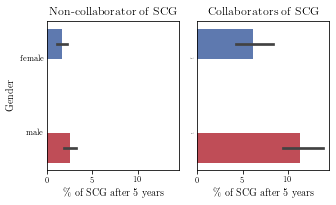

In [8]:
width = 345
fig, axs = plt.subplots(1, 2, figsize=set_size(width, fraction=1), sharex=True)

with sns.color_palette(colors):
    g = sns.barplot(y='gender', x='successful', hue='gender', data=gb[gb.colaborator==0], ax=axs[0],
                   hue_order=['female', 'male'])
    axs[0].legend_.remove()
    g = sns.barplot(y='gender', x='successful', hue='gender', data=gb[gb.colaborator==1], ax=axs[1],
                   hue_order=['female', 'male'])
axs[1].legend_.remove()
axs[1].tick_params(axis='y', size=0, labelsize=0)
axs[0].tick_params(axis='y', size=0)
axs[1].set_ylabel('')
axs[1].set_title('Collaborators of SCG')
axs[0].set_title('Non-collaborator of SCG')
axs[0].set_ylabel('Gender')
axs[0].set_xlabel('\% of SCG after 5 years')
axs[1].set_xlabel('\% of SCG after 5 years')
fig.tight_layout()
fig.savefig('../../figures/early_research.pdf');

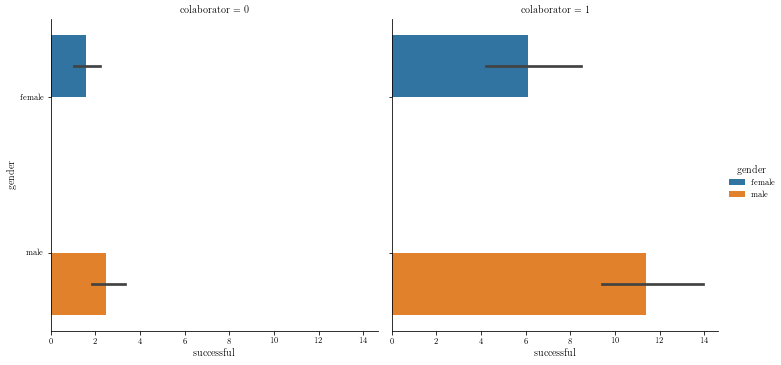

In [9]:
sns.catplot(y='gender', x='successful', hue='gender', col='colaborator', data=gb, kind='bar')